# Basic Interactive Plot Example

Requires `wrf-python` and `ipywidgets`

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
from datetime import datetime
from netCDF4 import Dataset
from wrf import getvar, interplevel, ALL_TIMES
from ipywidgets import interactive

ModuleNotFoundError: No module named 'netCDF4'

In [78]:
# Open a netCDF data file using xarray default engine and load the data into xarrays

path = '/expanse/lustre/projects/uic406/snesbitt/em_quarter_ss/mp10/'

ncfile = Dataset('wrfout_d01_0001-01-01_00:00:00')

# Extract slices of lon and lat
# Read in data from netCDF file.
# Note that when we extract ``u`` and ``v`` from the file,

# Extract the Geopotential Height and wind fields
z = getvar(ncfile, "z", timeidx = ALL_TIMES)
ua = getvar(ncfile, "ua", timeidx = ALL_TIMES)
va = getvar(ncfile, "va", timeidx = ALL_TIMES)
wa = getvar(ncfile, "wa", timeidx = ALL_TIMES)



interactive(children=(IntSlider(value=6, description='tindex', max=13), IntSlider(value=10000, description='le…

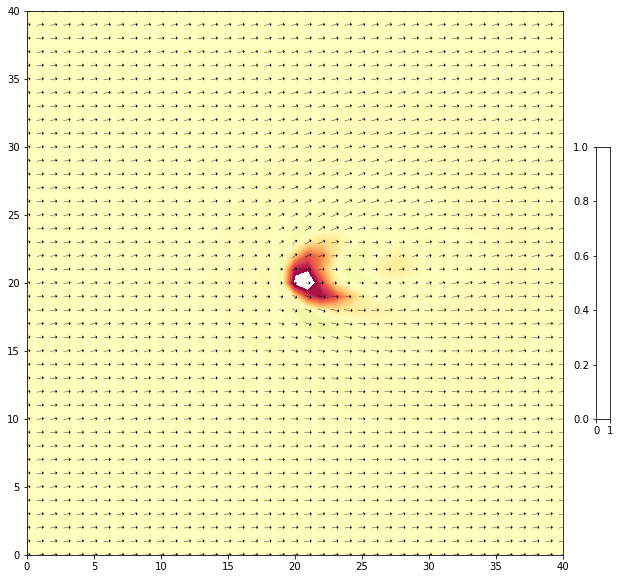

In [88]:

def plot_interact(tindex, level):
    ua_interp = interplevel(ua, z, level)
    va_interp = interplevel(va, z, level)
    wa_interp = interplevel(wa, z, level)

    fig1, ax1 = plt.subplots(figsize=(12, 10))
    
    cb = ax1.contourf(z['west_east'].values,
                   z['south_north'].values,
               wa_interp.isel(Time=tindex).values,levels=np.arange(-30,30,0.5),cmap='Spectral_r')

    Q = ax1.quiver(z['west_east'].values,
                   z['south_north'].values,
                   ua_interp.isel(Time=tindex).values,
                   va_interp.isel(Time=tindex).values,pivot='middle',color='black',
                   units='width',width=0.0007,headwidth=10)
    
    qk = ax1.quiverkey(Q, 0.92, .95, 5, r'$5 \frac{m}{s}$', labelpos='E',
                       coordinates='figure')

    cb = plt.colorbar(cb, shrink=0.5, title='Vertical wind (m/s)')

    ax1.set_title('Vertical motion (m/s) and winds (m/s) at time='+str(tindex)+' and level='+str(level))
    
    plt.tight_layout()
    plt.show()

interactive_plot = interactive(plot_interact, tindex=(0, 13), level=(0, 20000, 500))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

ValueError: Argument U has a size 1681 which does not match 40, the number of arrow positions

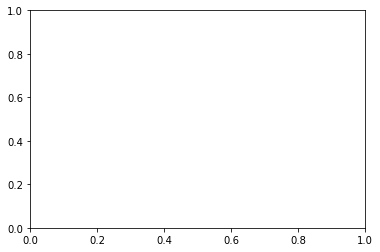

In [34]:
plt.quiver(x,ua_interp.values, va_interp.values)

In [39]:
x,y = np.meshgrid(z.west_east.values,z.south_north.values)

In [40]:
x

array([[ 0,  1,  2, ..., 38, 39, 40],
       [ 0,  1,  2, ..., 38, 39, 40],
       [ 0,  1,  2, ..., 38, 39, 40],
       ...,
       [ 0,  1,  2, ..., 38, 39, 40],
       [ 0,  1,  2, ..., 38, 39, 40],
       [ 0,  1,  2, ..., 38, 39, 40]])

In [41]:
y

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [38, 38, 38, ..., 38, 38, 38],
       [39, 39, 39, ..., 39, 39, 39],
       [40, 40, 40, ..., 40, 40, 40]])